In [1]:
import pandas as pd
import re,string
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

In [2]:
data = pd.read_excel('havells-hairdryer-reviews-final.xlsx')

In [3]:
data

product      profile_name  \
0     Havells HD3151 1200 W Foldable Hair Dryer; 3 H...     abrar lampard   
1     Havells HD3151 1200 W Foldable Hair Dryer; 3 H...          FASAL A.   
2     Havells HD3151 1200 W Foldable Hair Dryer; 3 H...    Hrishika Anand   
3     Havells HD3151 1200 W Foldable Hair Dryer; 3 H...              S D.   
4     Havells HD3151 1200 W Foldable Hair Dryer; 3 H...  Dhilip Jayakumar   
...                                                 ...               ...   
3085  Havells HD3151 1200 W Foldable Hair Dryer; 3 H...           Anupama   
3086  Havells HD3151 1200 W Foldable Hair Dryer; 3 H...    Sarjekul Hoque   
3087  Havells HD3151 1200 W Foldable Hair Dryer; 3 H...          Devendra   
3088  Havells HD3151 1200 W Foldable Hair Dryer; 3 H...            Amrita   
3089  Havells HD3151 1200 W Foldable Hair Dryer; 3 H...          Sharu P.   

                                                  title  rating  \
0        looks good doesn't work good. Not good at all.       3   
1                                           Recommended       4   
2                                        Impressive! ❤️       5   
3                     Stopped working after single use!       1   
4     Got too much heated and produce smoke with bur...       1   
...                                                 ...     ...   
3085                                       Good product       5   
3086                                               Good       5   
3087                                     Don’t purchase       1   
3088                                          satisfied       4   
3089                                               Nice       4   

                                                   body  
0     this is a terrible product. Spoilt in less tha...  
1     There are three types of control of air. First...  
2     A good budget, handy and supercool product.Imp...  
3     We were shocked to see a product from company ...  
4     On the first test itself with in 2 min the pro...  
...                                                 ...  
3085                                  It is very useful  
3086                                          Very nice  
3087                     Fan doesn’t work worst product  
3088                      good product... user friendly  
3089                                Very nice product..  

[3090 rows x 5 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       3090 non-null   object
 1   profile_name  3090 non-null   object
 2   title         3089 non-null   object
 3   rating        3090 non-null   int64 
 4   body          3081 non-null   object
dtypes: int64(1), object(4)
memory usage: 120.8+ KB


In [6]:
data.describe()

rating
count  3090.000000
mean      4.133657
std       1.292932
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

<AxesSubplot:>

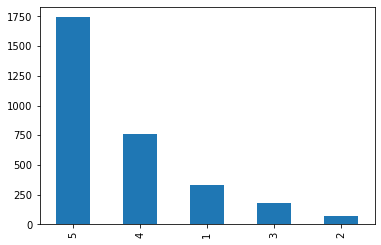

In [8]:
data['rating'].value_counts().plot(kind='bar')

In [6]:
data = data.dropna(axis=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 0 to 3089
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       3080 non-null   object
 1   profile_name  3080 non-null   object
 2   title         3080 non-null   object
 3   rating        3080 non-null   int64 
 4   body          3080 non-null   object
dtypes: int64(1), object(4)
memory usage: 144.4+ KB


In [8]:
review_title = pd.DataFrame(data.iloc[:,2])
review_title

title
0        looks good doesn't work good. Not good at all.
1                                           Recommended
2                                        Impressive! ❤️
3                     Stopped working after single use!
4     Got too much heated and produce smoke with bur...
...                                                 ...
3085                                       Good product
3086                                               Good
3087                                     Don’t purchase
3088                                          satisfied
3089                                               Nice

[3080 rows x 1 columns]

In [9]:
rev_title=[title.strip() for title in review_title.title]

In [10]:
rev_title

["looks good doesn't work good. Not good at all.",
 'Recommended',
 'Impressive! ❤️',
 'Stopped working after single use!',
 'Got too much heated and produce smoke with burnt smell',
 'Satisfied customer',
 'Stop working',
 'Don’t buy ! Stopped working',
 'WORST EVER HAIR DRYER, STOPPED WORKING AFTER ONE USE',
 'Handy Havell’s',
 'Crappy Hairdryer',
 "Aswm product.. Just love it's",
 'had to substitute my old dryer',
 'Long lasting premium product',
 'Bad product and no customer service',
 'Compact and Powerful !!',
 'AS EASY AS IT GETS',
 'Value for money',
 'Not worth the price',
 'Good built quality.',
 'Worst product ever, do not see 5 star ratings and buy!',
 'Best blow dryer under ₹1k',
 'Meets expectations. Also check IONIC type before choosing this',
 'Burning smell withing 3 days',
 'Happy customer 😀',
 'Best hair dryer',
 'Good product on a budget',
 'Worst product',
 'Awesome product with reasonable money to buy',
 "Looks Good but Doesn't Work.",
 'Good one',
 'Looks very ni

In [11]:
rev_title_texts = ' '.join(rev_title)
rev_title_texts

'looks good doesn\'t work good. Not good at all. Recommended Impressive! ❤️ Stopped working after single use! Got too much heated and produce smoke with burnt smell Satisfied customer Stop working Don’t buy ! Stopped working WORST EVER HAIR DRYER, STOPPED WORKING AFTER ONE USE Handy Havell’s Crappy Hairdryer Aswm product.. Just love it\'s had to substitute my old dryer Long lasting premium product Bad product and no customer service Compact and Powerful !! AS EASY AS IT GETS Value for money Not worth the price Good built quality. Worst product ever, do not see 5 star ratings and buy! Best blow dryer under ₹1k Meets expectations. Also check IONIC type before choosing this Burning smell withing 3 days Happy customer 😀 Best hair dryer Good product on a budget Worst product Awesome product with reasonable money to buy Looks Good but Doesn\'t Work. Good one Looks very nice Powerful air throw. Easy to use. Heat settings are nice. Useful Cool shot button Blockbuster deal, BUT.... Good Product

In [12]:
nopun_text = rev_title_texts.translate(str.maketrans('','',string.punctuation))

In [13]:
nopun_text

'looks good doesnt work good Not good at all Recommended Impressive ❤️ Stopped working after single use Got too much heated and produce smoke with burnt smell Satisfied customer Stop working Don’t buy  Stopped working WORST EVER HAIR DRYER STOPPED WORKING AFTER ONE USE Handy Havell’s Crappy Hairdryer Aswm product Just love its had to substitute my old dryer Long lasting premium product Bad product and no customer service Compact and Powerful  AS EASY AS IT GETS Value for money Not worth the price Good built quality Worst product ever do not see 5 star ratings and buy Best blow dryer under ₹1k Meets expectations Also check IONIC type before choosing this Burning smell withing 3 days Happy customer 😀 Best hair dryer Good product on a budget Worst product Awesome product with reasonable money to buy Looks Good but Doesnt Work Good one Looks very nice Powerful air throw Easy to use Heat settings are nice Useful Cool shot button Blockbuster deal BUT Good Product works absolutely fine✌✌✌ Dup

In [14]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)

In [15]:
print(emoji_pattern.sub(r'', nopun_text))

looks good doesnt work good Not good at all Recommended Impressive  Stopped working after single use Got too much heated and produce smoke with burnt smell Satisfied customer Stop working Don’t buy  Stopped working WORST EVER HAIR DRYER STOPPED WORKING AFTER ONE USE Handy Havell’s Crappy Hairdryer Aswm product Just love its had to substitute my old dryer Long lasting premium product Bad product and no customer service Compact and Powerful  AS EASY AS IT GETS Value for money Not worth the price Good built quality Worst product ever do not see 5 star ratings and buy Best blow dryer under ₹1k Meets expectations Also check IONIC type before choosing this Burning smell withing 3 days Happy customer  Best hair dryer Good product on a budget Worst product Awesome product with reasonable money to buy Looks Good but Doesnt Work Good one Looks very nice Powerful air throw Easy to use Heat settings are nice Useful Cool shot button Blockbuster deal BUT Good Product works absolutely fine Duplicate 

In [16]:
no_emoj_text_revtitle = emoji_pattern.sub(r'', nopun_text)

In [17]:
print(no_emoj_text_revtitle.lower())

looks good doesnt work good not good at all recommended impressive  stopped working after single use got too much heated and produce smoke with burnt smell satisfied customer stop working don’t buy  stopped working worst ever hair dryer stopped working after one use handy havell’s crappy hairdryer aswm product just love its had to substitute my old dryer long lasting premium product bad product and no customer service compact and powerful  as easy as it gets value for money not worth the price good built quality worst product ever do not see 5 star ratings and buy best blow dryer under ₹1k meets expectations also check ionic type before choosing this burning smell withing 3 days happy customer  best hair dryer good product on a budget worst product awesome product with reasonable money to buy looks good but doesnt work good one looks very nice powerful air throw easy to use heat settings are nice useful cool shot button blockbuster deal but good product works absolutely fine duplicate 

In [18]:
no_emoj_text_revtitle_lower = no_emoj_text_revtitle.lower()

In [19]:
from nltk.tokenize import word_tokenize
rev_title_text_tokens=word_tokenize(no_emoj_text_revtitle_lower)
print(rev_title_text_tokens)

['looks', 'good', 'doesnt', 'work', 'good', 'not', 'good', 'at', 'all', 'recommended', 'impressive', 'stopped', 'working', 'after', 'single', 'use', 'got', 'too', 'much', 'heated', 'and', 'produce', 'smoke', 'with', 'burnt', 'smell', 'satisfied', 'customer', 'stop', 'working', 'don', '’', 't', 'buy', 'stopped', 'working', 'worst', 'ever', 'hair', 'dryer', 'stopped', 'working', 'after', 'one', 'use', 'handy', 'havell', '’', 's', 'crappy', 'hairdryer', 'aswm', 'product', 'just', 'love', 'its', 'had', 'to', 'substitute', 'my', 'old', 'dryer', 'long', 'lasting', 'premium', 'product', 'bad', 'product', 'and', 'no', 'customer', 'service', 'compact', 'and', 'powerful', 'as', 'easy', 'as', 'it', 'gets', 'value', 'for', 'money', 'not', 'worth', 'the', 'price', 'good', 'built', 'quality', 'worst', 'product', 'ever', 'do', 'not', 'see', '5', 'star', 'ratings', 'and', 'buy', 'best', 'blow', 'dryer', 'under', '₹1k', 'meets', 'expectations', 'also', 'check', 'ionic', 'type', 'before', 'choosing', 't

In [20]:
my_stop_word = np.loadtxt('stop.txt',dtype='str')
my_stop_word

array(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly',
       'across', 'actually', 'after', 'afterwards', 'again', 'against',
       "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along',
       'already', 'also', 'although', 'always', 'am', 'among', 'amongst',
       'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
       'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear',
       'appreciate', 'appropriate', 'are', "aren't", 'around', 'as',
       'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away',
       'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes',
       'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
       'believe', 'below', 'beside', 'besides', 'best', 'better',
       'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon",
       "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes',
       'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',


In [21]:
no_stop_revtitle_tokens=[word for word in rev_title_text_tokens if not word in my_stop_word]
print(no_stop_revtitle_tokens)

['good', 'doesnt', 'work', 'good', 'good', 'recommended', 'impressive', 'stopped', 'working', 'single', 'heated', 'produce', 'smoke', 'burnt', 'smell', 'satisfied', 'customer', 'stop', 'working', 'don', '’', 'buy', 'stopped', 'working', 'worst', 'hair', 'dryer', 'stopped', 'working', 'handy', 'havell', '’', 'crappy', 'hairdryer', 'aswm', 'product', 'love', 'substitute', 'dryer', 'long', 'lasting', 'premium', 'product', 'bad', 'product', 'customer', 'service', 'compact', 'powerful', 'easy', 'money', 'worth', 'price', 'good', 'built', 'quality', 'worst', 'product', '5', 'star', 'ratings', 'buy', 'blow', 'dryer', '₹1k', 'meets', 'expectations', 'check', 'ionic', 'type', 'choosing', 'burning', 'smell', 'withing', '3', 'days', 'happy', 'customer', 'hair', 'dryer', 'good', 'product', 'budget', 'worst', 'product', 'awesome', 'product', 'reasonable', 'money', 'buy', 'good', 'doesnt', 'work', 'good', 'nice', 'powerful', 'air', 'throw', 'easy', 'heat', 'settings', 'nice', 'cool', 'shot', 'button

In [22]:
clean_rev_title = ' '.join(no_stop_revtitle_tokens)
clean_rev_title

'good doesnt work good good recommended impressive stopped working single heated produce smoke burnt smell satisfied customer stop working don ’ buy stopped working worst hair dryer stopped working handy havell ’ crappy hairdryer aswm product love substitute dryer long lasting premium product bad product customer service compact powerful easy money worth price good built quality worst product 5 star ratings buy blow dryer ₹1k meets expectations check ionic type choosing burning smell withing 3 days happy customer hair dryer good product budget worst product awesome product reasonable money buy good doesnt work good nice powerful air throw easy heat settings nice cool shot button blockbuster deal good product works absolutely fine duplicate damaged replacement good easy product stopped working 1st nice product product dryer range great product cold air option waste money time buying appliance online worthy amount good excellent coordination makerseller parcelling teamglobally universal 

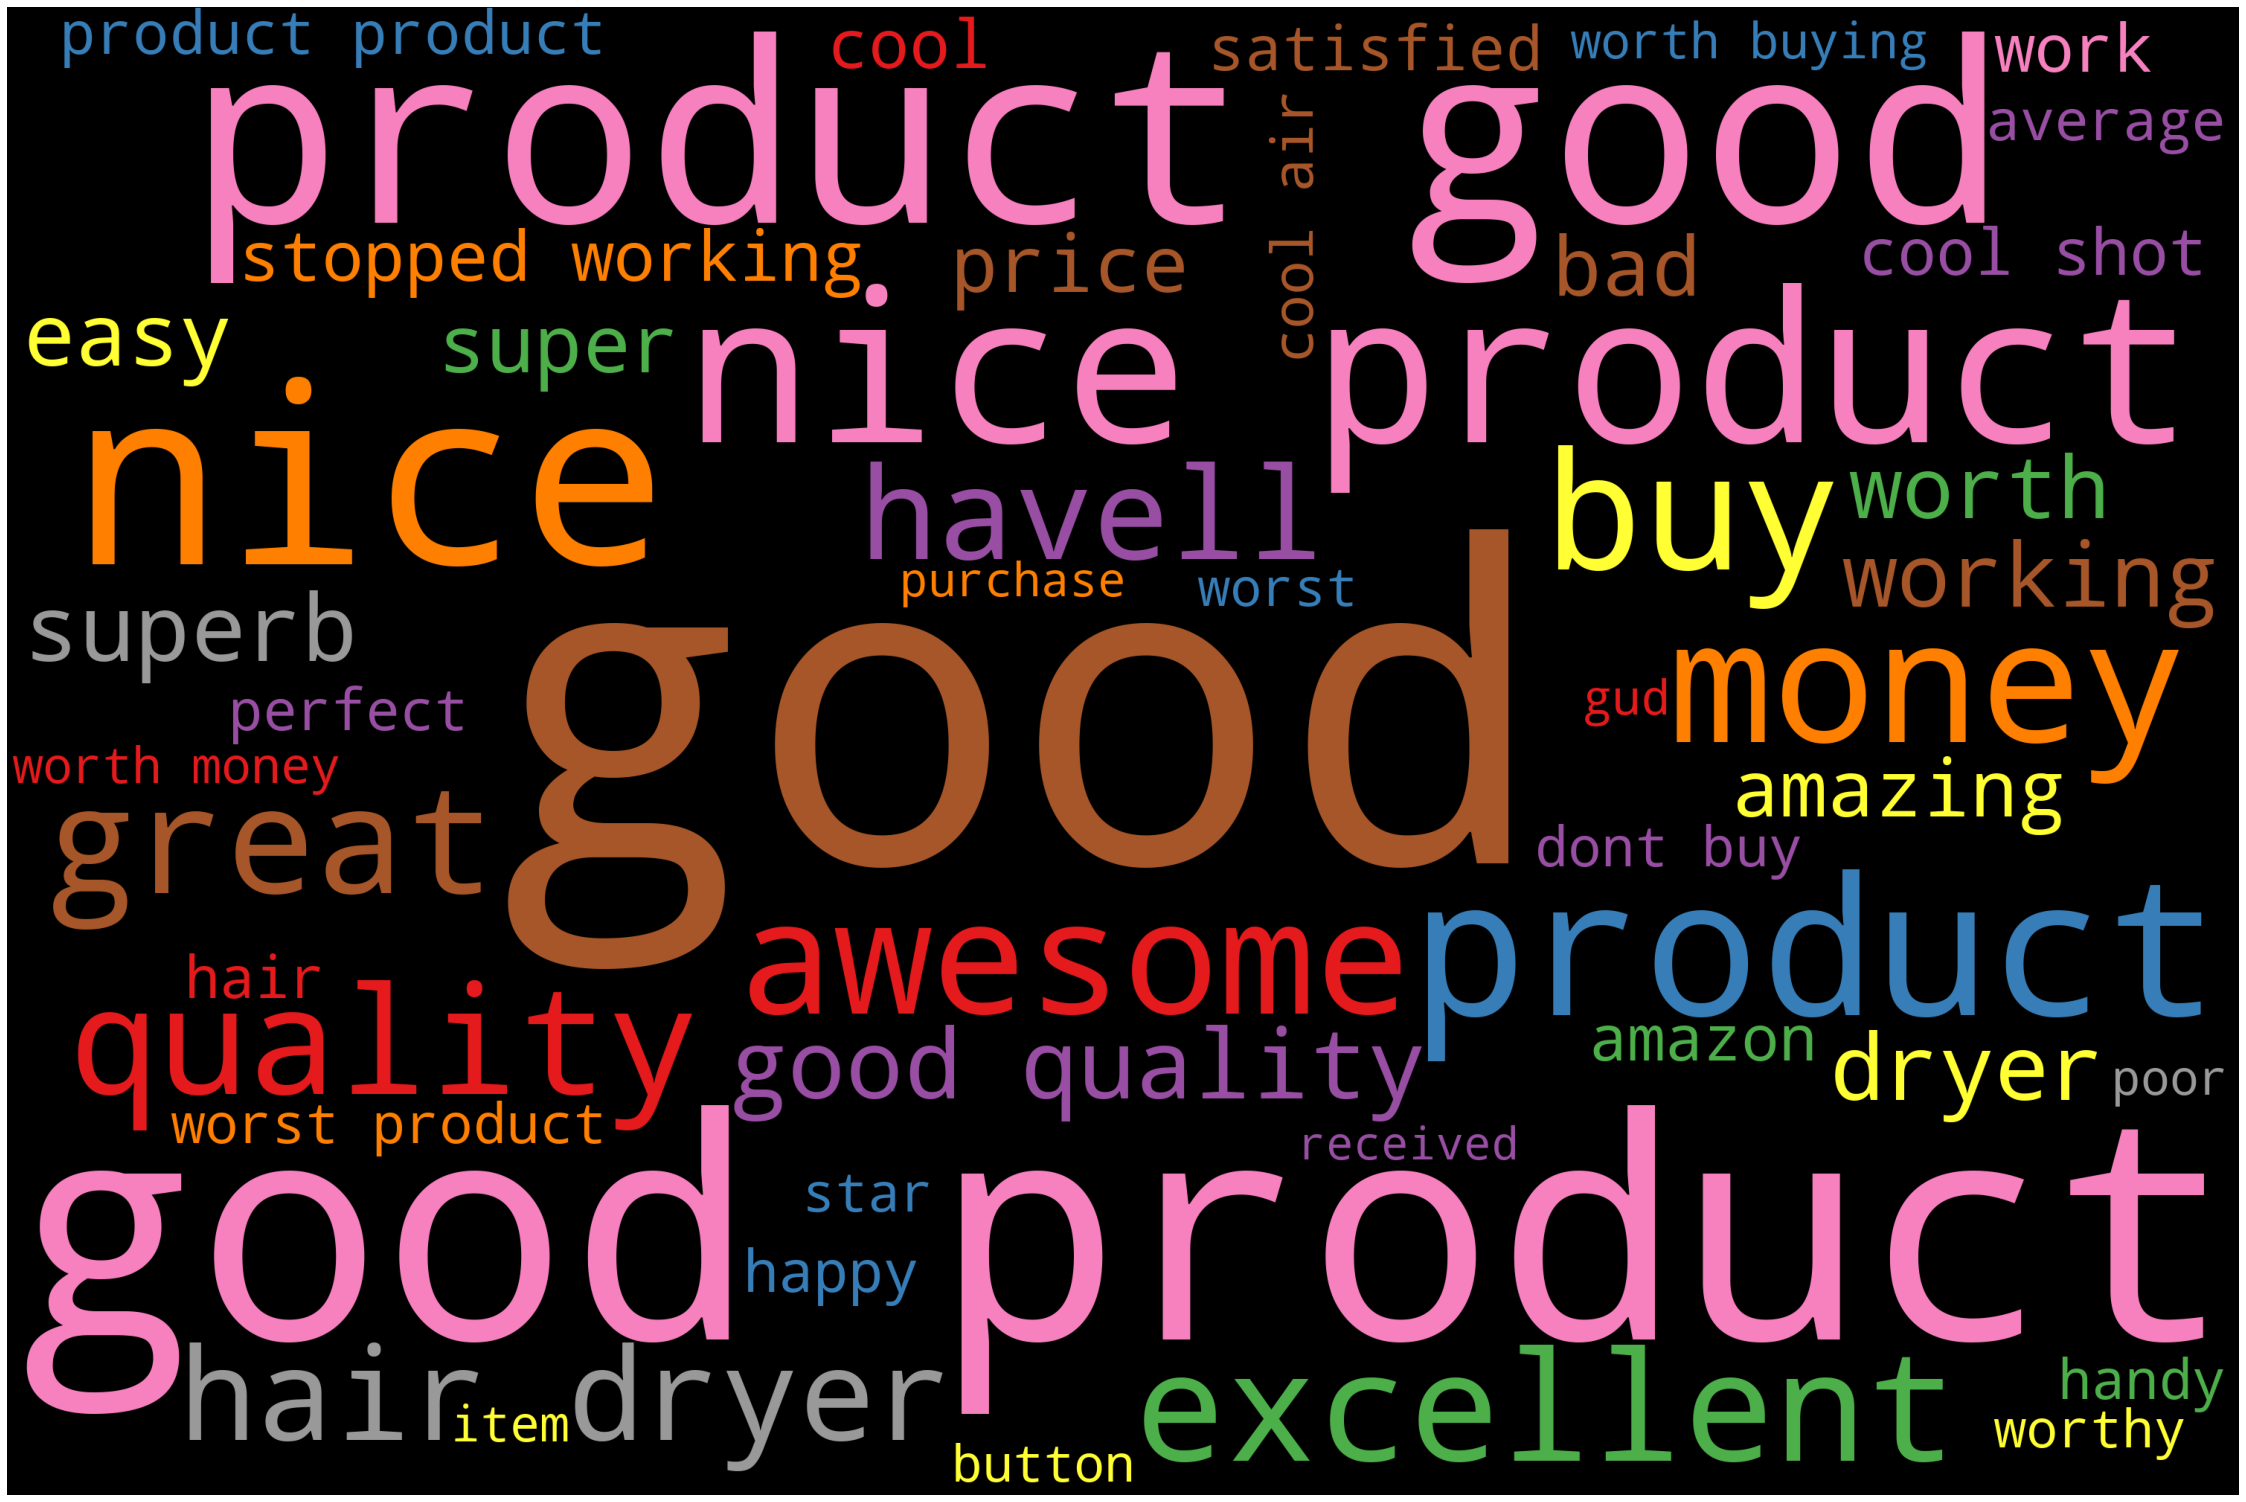

In [23]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_rev_title)
plot_cloud(wordcloud)

In [24]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(no_stop_revtitle_tokens))
print(doc)

good doesnt work good good recommended impressive stopped working single heated produce smoke burnt smell satisfied customer stop working don ’ buy stopped working worst hair dryer stopped working handy havell ’ crappy hairdryer aswm product love substitute dryer long lasting premium product bad product customer service compact powerful easy money worth price good built quality worst product 5 star ratings buy blow dryer ₹1k meets expectations check ionic type choosing burning smell withing 3 days happy customer hair dryer good product budget worst product awesome product reasonable money buy good doesnt work good nice powerful air throw easy heat settings nice cool shot button blockbuster deal good product works absolutely fine duplicate damaged replacement good easy product stopped working 1st nice product product dryer range great product cold air option waste money time buying appliance online worthy amount good excellent coordination makerseller parcelling teamglobally universal s

In [36]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'do', 'not', 'work', 'good', 'good', 'recommend', 'impressive', 'stop', 'work', 'single', 'heated', 'produce', 'smoke', 'burn', 'smell', 'satisfied', 'customer', 'stop', 'work', 'don', "'", 'buy', 'stop', 'work', 'bad', 'hair', 'dryer', 'stop', 'work', 'handy', 'havell', "'", 'crappy', 'hairdryer', 'aswm', 'product', 'love', 'substitute', 'dryer', 'long', 'last', 'premium', 'product', 'bad', 'product', 'customer', 'service', 'compact', 'powerful', 'easy', 'money', 'worth', 'price', 'good', 'build', 'quality', 'bad', 'product', '5', 'star', 'rating', 'buy', 'blow', 'dryer', '₹', '1k', 'meet', 'expectation', 'check', 'ionic', 'type', 'choose', 'burn', 'smell', 'withe', '3', 'day', 'happy', 'customer', 'hair', 'dryer', 'good', 'product', 'budget', 'bad', 'product', 'awesome', 'product', 'reasonable', 'money', 'buy', 'good', 'do', 'not', 'work', 'good', 'nice', 'powerful', 'air', 'throw', 'easy', 'heat', 'setting', 'nice', 'cool', 'shoot', 'button', 'blockbuster', 'deal', 'good', 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
revtitlecv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'good': 297, 'do': 214, 'not': 472, 'work': 789, 'recommend': 591, 'impressive': 368, 'stop': 672, 'single': 649, 'heated': 335, 'produce': 555, 'smoke': 655, 'burn': 106, 'smell': 654, 'satisfied': 623, 'customer': 174, 'don': 216, 'buy': 112, 'bad': 76, 'hair': 312, 'dryer': 225, 'handy': 319, 'havell': 326, 'crappy': 173, 'hairdryer': 313, 'aswm': 62, 'product': 556, 'love': 415, 'substitute': 678, 'long': 413, 'last': 400, 'premium': 538, 'service': 634, 'compact': 152, 'powerful': 536, 'easy': 233, 'money': 447, 'worth': 793, 'price': 545, 'build': 104, 'quality': 577, 'star': 671, 'rating': 586, 'blow': 95, '1k': 12, 'meet': 432, 'expectation': 249, 'check': 131, 'ionic': 377, 'type': 736, 'choose': 136, 'withe': 784, 'day': 183, 'happy': 321, 'budget': 103, 'awesome': 70, 'reasonable': 588, 'nice': 459, 'air': 41, 'throw': 718, 'heat': 334, 'setting': 636, 'cool': 165, 'shoot': 639, 'button': 110, 'blockbuster': 93, 'deal': 185, 'absolutely': 33, 'fine': 271, 'duplicate': 228, 

In [40]:
print(cv.get_feature_names()[0:100])

['10', '100', '1010', '10amp', '1200', '1200w', '14', '14days', '15', '1600', '1600w', '181221', '1k', '1st', '2days', '2nd', '2week', '30', '3months', '3rd', '3weeks', '45', '4star', '4th', '5month', '600rsok', '699', '700', '910', '9yzz', 'a1', 'aati', 'absence', 'absolutely', 'accessory', 'accha', 'acha', 'adequate', 'adjustable', 'adorable', 'affordable', 'air', 'airand', 'airflow', 'alert', 'amazen', 'amazing', 'amazingly', 'amazom', 'amazon', 'amazonhavell', 'amezon', 'amount', 'amzon', 'angry', 'app', 'appearance', 'appliance', 'approve', 'areel', 'ask', 'astonish', 'aswm', 'auto', 'automatic', 'avaliable', 'avareg', 'average', 'avoidbadly', 'awasom', 'awesome', 'awsm', 'awsome', 'baby', 'back', 'backup', 'bad', 'badd', 'baliye', 'bang', 'battery', 'beautiful', 'beautifully', 'bestttt', 'beware', 'bhargav', 'big', 'bill', 'bina', 'binod', 'black', 'blend', 'blindly', 'blockbuster', 'bloody', 'blow', 'blower', 'blue', 'box', 'brand']


In [41]:
print(revtitlecv.toarray()[0:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(revtitlecv.toarray().shape)

(5746, 809)


In [43]:
one_block=clean_rev_title
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [44]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

throw VERB
easy ADJ
heat NOUN
settings NOUN
nice ADV
cool ADV
shot VERB
button NOUN
blockbuster NOUN
deal NOUN
good ADJ
product NOUN
works VERB
absolutely ADV
fine ADJ
duplicate NOUN
damaged VERB
replacement NOUN
good ADJ
easy ADJ
product NOUN
stopped VERB
working VERB
1st NOUN
nice ADJ
product NOUN
product NOUN
dryer NOUN
range VERB
great ADJ
product NOUN
cold ADJ
air NOUN
option NOUN
waste NOUN
money NOUN
time NOUN
buying VERB
appliance NOUN
online ADJ
worthy ADJ
amount NOUN
good ADJ
excellent ADJ
coordination NOUN
makerseller NOUN
parcelling VERB
teamglobally ADV
universal ADJ
service NOUN
cool ADJ
powerful ADJ
replacement NOUN
working VERB
great ADJ
product NOUN
considered VERB
money NOUN
stopped VERB
working VERB
2days NUM
burning VERB
smell NOUN
coming VERB
cool ADJ
air NOUN
hold VERB
button NOUN
faulty ADJ
model NOUN
do AUX
nt PART
buy VERB
stops NOUN
working VERB
wait VERB
cold ADJ
today NOUN
2 NUM
years NOUN
1 NUM
month NOUN
drier NOUN
died VERB
good ADV
shown VERB
guaranteewa

In [56]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
adjs=[token.text for token in doc_block if token.pos_ in ('ADJ')]

print(adjs[0:50])

['good', 'good', 'good', 'impressive', 'single', 'heated', 'satisfied', 'worst', 'handy', 'long', 'bad', 'compact', 'powerful', 'easy', 'worth', 'good', 'worst', 'ionic', 'happy', 'good', 'worst', 'awesome', 'reasonable', 'good', 'good', 'nice', 'powerful', 'easy', 'good', 'fine', 'good', 'easy', 'nice', 'great', 'cold', 'online', 'worthy', 'good', 'excellent', 'universal', 'cool', 'powerful', 'great', 'cool', 'faulty', 'cold', 'good', 'great', 'cool', 'foldable']


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(adjs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0       good    867
1       nice    318
2      worth     80
3    awesome     76
4  excellent     74
5      great     72
6       cool     61
7      worst     38
8       easy     37
9        bad     36

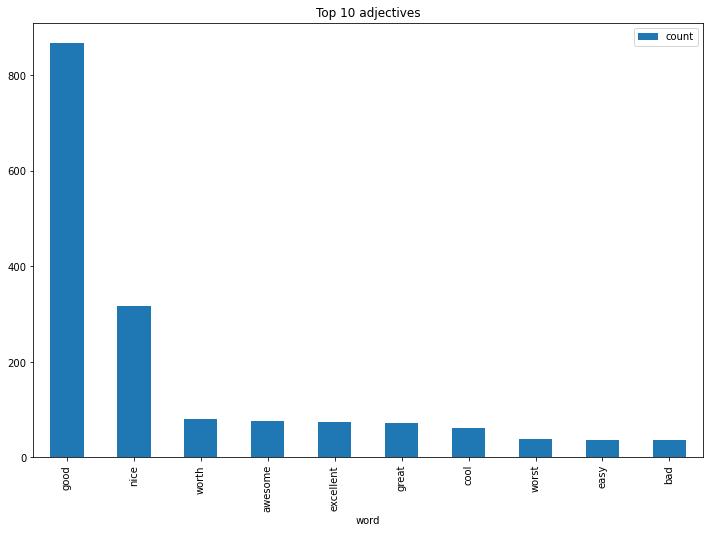

In [60]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 adjectives');

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df1=pd.DataFrame(words_freq)
wd_df1.columns=['word','count']
wd_df1[0:10]

word  count
0  product    788
1  quality    123
2    money    122
3      buy    106
4    dryer     94
5  working     88
6     hair     70
7  havells     54
8    price     49
9      air     47

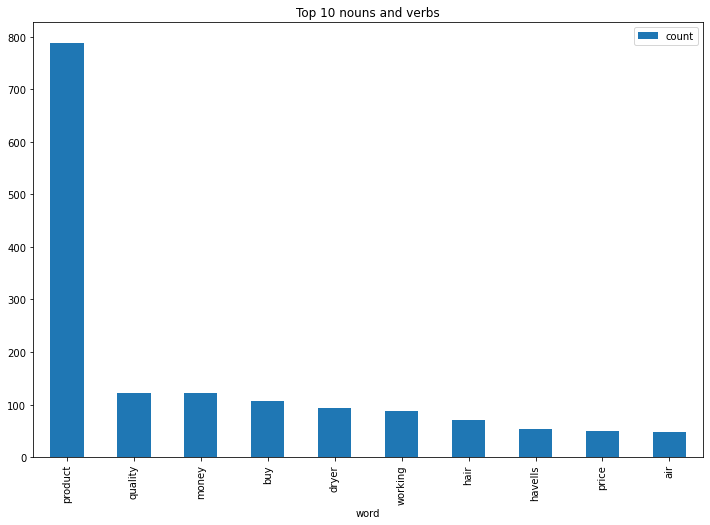

In [62]:
wd_df1[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [25]:
review_body = pd.DataFrame(data.iloc[:,4])
review_body

body
0     this is a terrible product. Spoilt in less tha...
1     There are three types of control of air. First...
2     A good budget, handy and supercool product.Imp...
3     We were shocked to see a product from company ...
4     On the first test itself with in 2 min the pro...
...                                                 ...
3085                                  It is very useful
3086                                          Very nice
3087                     Fan doesn’t work worst product
3088                      good product... user friendly
3089                                Very nice product..

[3080 rows x 1 columns]

In [26]:
rev_body=[body.strip() for body in review_body.body]
rev_body

['this is a terrible product. Spoilt in less than 5 days of use. The fan stopped working. The coil inside turns red like fire and its dangerous. Dont buy it. Its a scam product.',
 'There are three types of control of air. First switch for blowing normal fan mode. Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air. While it blows a little far it gives normal air. Second and third switch to increase the hotness of air. The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling. Good for daily use and value for money.',
 'A good budget, handy and supercool product.Impressive performance.Go for it. 💯',
 "We were shocked to see a product from company like Havel's stopped working in single use.My wife wasn't using it continually. Even due to prejudice we didn't inbox it for 7 days until we thought all the corona viruses were dead 😁But may be it had the virus and the device died in checking !!!

In [27]:
rev_body_texts = ' '.join(rev_body)
rev_body_texts

'this is a terrible product. Spoilt in less than 5 days of use. The fan stopped working. The coil inside turns red like fire and its dangerous. Dont buy it. Its a scam product. There are three types of control of air. First switch for blowing normal fan mode. Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air. While it blows a little far it gives normal air. Second and third switch to increase the hotness of air. The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling. Good for daily use and value for money. A good budget, handy and supercool product.Impressive performance.Go for it. 💯 We were shocked to see a product from company like Havel\'s stopped working in single use.My wife wasn\'t using it continually. Even due to prejudice we didn\'t inbox it for 7 days until we thought all the corona viruses were dead 😁But may be it had the virus and the device died in checking !!!!!!! 😆😆😆Ha

In [28]:
nopun_text_rb = rev_body_texts.translate(str.maketrans('','',string.punctuation))
nopun_text_rb

'this is a terrible product Spoilt in less than 5 days of use The fan stopped working The coil inside turns red like fire and its dangerous Dont buy it Its a scam product There are three types of control of air First switch for blowing normal fan mode Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air While it blows a little far it gives normal air Second and third switch to increase the hotness of air The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling Good for daily use and value for money A good budget handy and supercool productImpressive performanceGo for it 💯 We were shocked to see a product from company like Havels stopped working in single useMy wife wasnt using it continually Even due to prejudice we didnt inbox it for 7 days until we thought all the corona viruses were dead 😁But may be it had the virus and the device died in checking  😆😆😆Had to contact the customer care f

In [29]:
no_emoj_text_revbody = emoji_pattern.sub(r'', nopun_text_rb)
no_emoj_text_revbody

'this is a terrible product Spoilt in less than 5 days of use The fan stopped working The coil inside turns red like fire and its dangerous Dont buy it Its a scam product There are three types of control of air First switch for blowing normal fan mode Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air While it blows a little far it gives normal air Second and third switch to increase the hotness of air The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling Good for daily use and value for money A good budget handy and supercool productImpressive performanceGo for it  We were shocked to see a product from company like Havels stopped working in single useMy wife wasnt using it continually Even due to prejudice we didnt inbox it for 7 days until we thought all the corona viruses were dead But may be it had the virus and the device died in checking  Had to contact the customer care for se

In [30]:
no_url_text=re.sub(r'The media could not be loaded\n                \n\n\n\n\xa0', '', no_emoj_text_revbody)
no_url_text

'this is a terrible product Spoilt in less than 5 days of use The fan stopped working The coil inside turns red like fire and its dangerous Dont buy it Its a scam product There are three types of control of air First switch for blowing normal fan mode Though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air While it blows a little far it gives normal air Second and third switch to increase the hotness of air The neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling Good for daily use and value for money A good budget handy and supercool productImpressive performanceGo for it  We were shocked to see a product from company like Havels stopped working in single useMy wife wasnt using it continually Even due to prejudice we didnt inbox it for 7 days until we thought all the corona viruses were dead But may be it had the virus and the device died in checking  Had to contact the customer care for se

In [31]:
no_url_text_lower = no_url_text.lower()
no_url_text_lower

'this is a terrible product spoilt in less than 5 days of use the fan stopped working the coil inside turns red like fire and its dangerous dont buy it its a scam product there are three types of control of air first switch for blowing normal fan mode though it’s fan mode when you use it very close to the mouth of air dryer it gives a little hot air while it blows a little far it gives normal air second and third switch to increase the hotness of air the neck of air blower can fold it on the same direction of its handle so it’s easy to carry while traveling good for daily use and value for money a good budget handy and supercool productimpressive performancego for it  we were shocked to see a product from company like havels stopped working in single usemy wife wasnt using it continually even due to prejudice we didnt inbox it for 7 days until we thought all the corona viruses were dead but may be it had the virus and the device died in checking  had to contact the customer care for se

In [32]:
rev_body_text_tokens=word_tokenize(no_url_text_lower)
print(rev_body_text_tokens)

['this', 'is', 'a', 'terrible', 'product', 'spoilt', 'in', 'less', 'than', '5', 'days', 'of', 'use', 'the', 'fan', 'stopped', 'working', 'the', 'coil', 'inside', 'turns', 'red', 'like', 'fire', 'and', 'its', 'dangerous', 'dont', 'buy', 'it', 'its', 'a', 'scam', 'product', 'there', 'are', 'three', 'types', 'of', 'control', 'of', 'air', 'first', 'switch', 'for', 'blowing', 'normal', 'fan', 'mode', 'though', 'it', '’', 's', 'fan', 'mode', 'when', 'you', 'use', 'it', 'very', 'close', 'to', 'the', 'mouth', 'of', 'air', 'dryer', 'it', 'gives', 'a', 'little', 'hot', 'air', 'while', 'it', 'blows', 'a', 'little', 'far', 'it', 'gives', 'normal', 'air', 'second', 'and', 'third', 'switch', 'to', 'increase', 'the', 'hotness', 'of', 'air', 'the', 'neck', 'of', 'air', 'blower', 'can', 'fold', 'it', 'on', 'the', 'same', 'direction', 'of', 'its', 'handle', 'so', 'it', '’', 's', 'easy', 'to', 'carry', 'while', 'traveling', 'good', 'for', 'daily', 'use', 'and', 'value', 'for', 'money', 'a', 'good', 'budg

In [33]:
no_stop_revbody_tokens=[word for word in rev_body_text_tokens if not word in my_stop_word]
print(no_stop_revbody_tokens)

['terrible', 'product', 'spoilt', '5', 'days', 'fan', 'stopped', 'working', 'coil', 'inside', 'turns', 'red', 'fire', 'dangerous', 'dont', 'buy', 'scam', 'product', 'types', 'control', 'air', 'switch', 'blowing', 'normal', 'fan', 'mode', '’', 'fan', 'mode', 'close', 'mouth', 'air', 'dryer', 'hot', 'air', 'blows', 'normal', 'air', 'switch', 'increase', 'hotness', 'air', 'neck', 'air', 'blower', 'fold', 'direction', 'handle', '’', 'easy', 'carry', 'traveling', 'good', 'daily', 'money', 'good', 'budget', 'handy', 'supercool', 'productimpressive', 'performancego', 'shocked', 'product', 'company', 'havels', 'stopped', 'working', 'single', 'usemy', 'wife', 'wasnt', 'continually', 'due', 'prejudice', 'didnt', 'inbox', '7', 'days', 'thought', 'corona', 'viruses', 'dead', 'virus', 'device', 'died', 'checking', 'contact', 'customer', 'care', 'service', 'service', 'engineer', 'contacted', 'told', 'place', 'allowing', 'outsiders', 'home', 'ofcourse', 'due', 'corona', 'scareanyway', 'im', 'happy', 

In [34]:
clean_rev_body = ' '.join(no_stop_revbody_tokens)
clean_rev_body

'terrible product spoilt 5 days fan stopped working coil inside turns red fire dangerous dont buy scam product types control air switch blowing normal fan mode ’ fan mode close mouth air dryer hot air blows normal air switch increase hotness air neck air blower fold direction handle ’ easy carry traveling good daily money good budget handy supercool productimpressive performancego shocked product company havels stopped working single usemy wife wasnt continually due prejudice didnt inbox 7 days thought corona viruses dead virus device died checking contact customer care service service engineer contacted told place allowing outsiders home ofcourse due corona scareanyway im happy timely delivery service contract product breakdownbut guys make sturdy products cheap chinese products easily lower prices find review add video poor hair dryer test 2 min product reddish orange fire color produce smoke suddenly stopped working 30 min drier running coil heating produce smoke burnt smell worth s

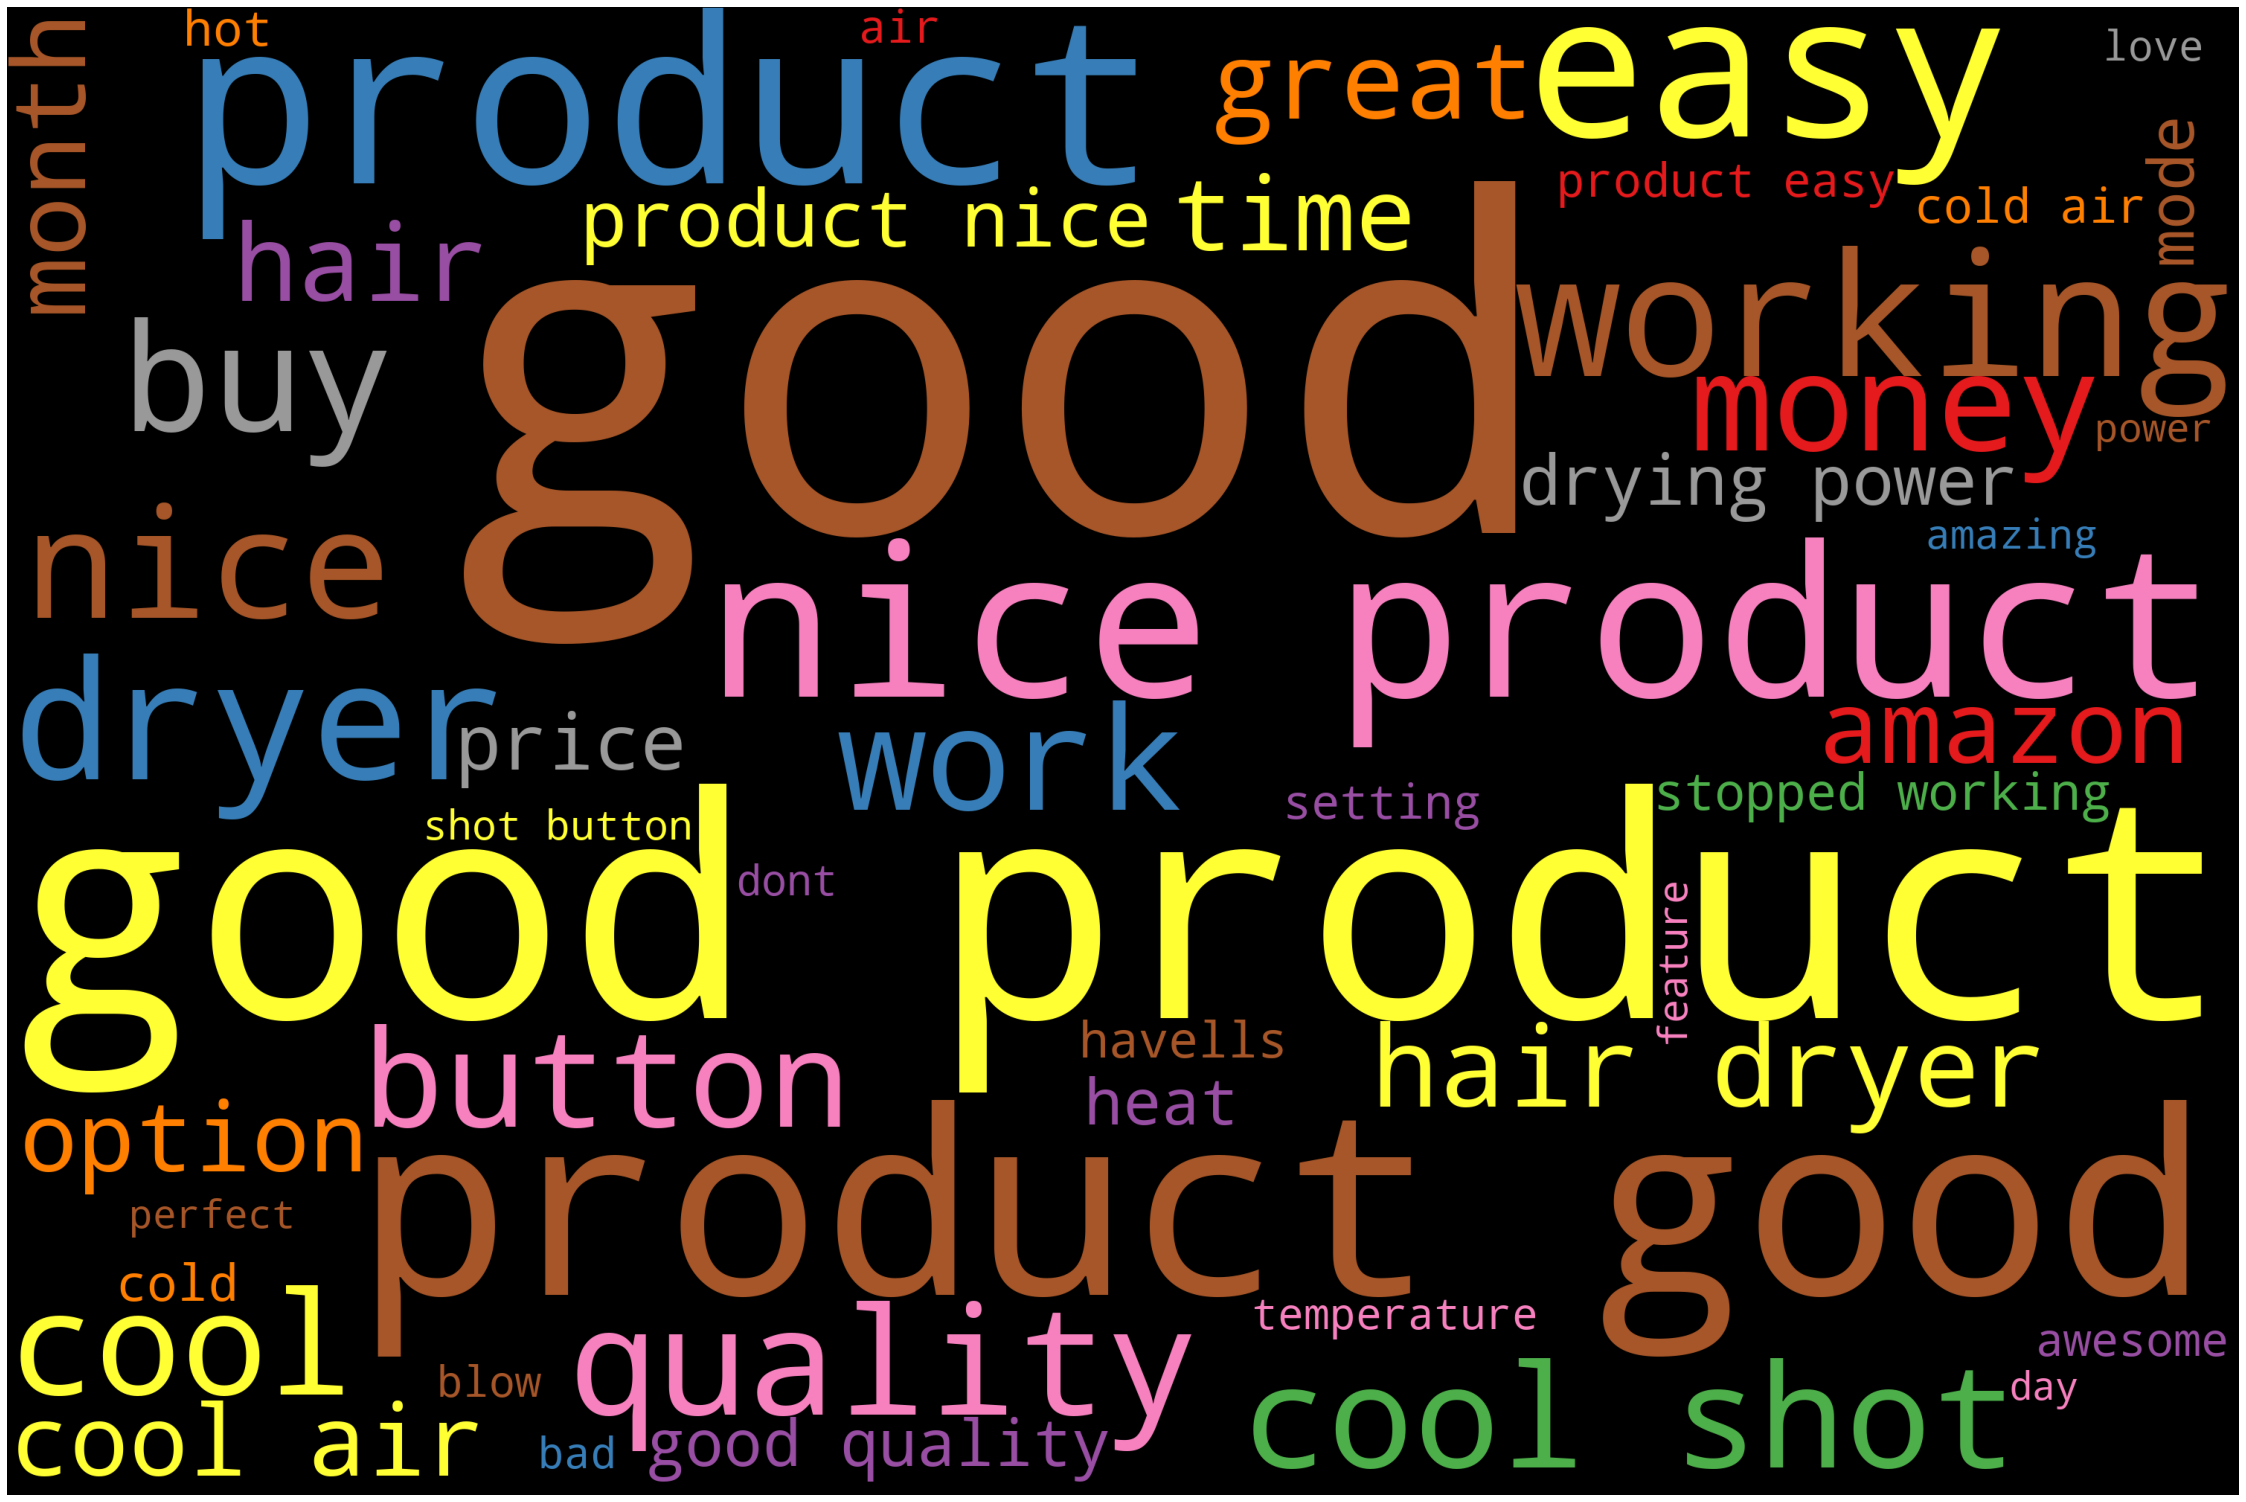

In [35]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_rev_body)
plot_cloud(wordcloud)

In [63]:
one_block1=clean_rev_body
doc_block1=nlp(one_block1)
spacy.displacy.render(doc_block1,style='ent',jupyter=True)

In [64]:
for token in doc_block1[100:200]:
    print(token,token.pos_)

home NOUN
ofcourse NOUN
due ADJ
corona PROPN
scareanyway NOUN
i PRON
m VERB
happy ADJ
timely ADJ
delivery NOUN
service NOUN
contract NOUN
product NOUN
breakdownbut ADP
guys NOUN
make VERB
sturdy ADJ
products NOUN
cheap ADJ
chinese ADJ
products NOUN
easily ADV
lower ADJ
prices NOUN
find VERB
review NOUN
add VERB
video NOUN
poor ADJ
hair NOUN
dryer NOUN
test NOUN
2 NUM
min NOUN
product NOUN
reddish ADJ
orange NOUN
fire NOUN
color NOUN
produce VERB
smoke NOUN
suddenly ADV
stopped VERB
working VERB
30 NUM
min NOUN
drier NOUN
running VERB
coil NOUN
heating NOUN
produce NOUN
smoke NOUN
burnt VERB
smell NOUN
worth ADJ
single ADJ
star NOUN
product NOUN
gotto NOUN
amazon NOUN
provide VERB
product NOUN
testing NOUN
awesome ADJ
time NOUN
philips VERB
hairdryer NOUN
lowcost ADV
give VERB
star NOUN
satisfied ADJ
price NOUN
product NOUN
beautiful ADJ
dryer NOUN
stop VERB
working VERB
yesterday NOUN
replacement NOUN
maintenance NOUN
grantee PROPN
item NOUN
day NOUN
work NOUN
superly ADV
suddenly ADV


In [65]:
nouns_verbs1=[token.text for token in doc_block1 if token.pos_ in ('NOUN','VERB')]
adjs1=[token.text for token in doc_block1 if token.pos_ in ('ADJ')]

print(adjs1[0:50])

['terrible', 'red', 'dangerous', 'normal', 'close', 'hot', 'normal', 'fold', 'easy', 'good', 'daily', 'good', 'handy', 'productimpressive', 'single', 'due', 'dead', 'due', 'happy', 'timely', 'sturdy', 'cheap', 'chinese', 'lower', 'poor', 'reddish', 'worth', 'single', 'awesome', 'satisfied', 'beautiful', 'good', 'happy', 'fine', 'bad', 'careful', 'simple', 'effective', 'handy', 'dry', 'cool', 'scared', 'disappointed', 'crappy', 'nice', 'quick', 'favourite', 'constant', 'wise', 'cheaper']


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(adjs1)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_dfb=pd.DataFrame(words_freq)
wd_dfb.columns=['word','count']
wd_dfb[0:10]

word  count
0     good   1183
1     nice    373
2     easy    224
3     cool    217
4      hot    146
5     cold    130
6    worth     99
7     warm     97
8    great     90
9  awesome     84

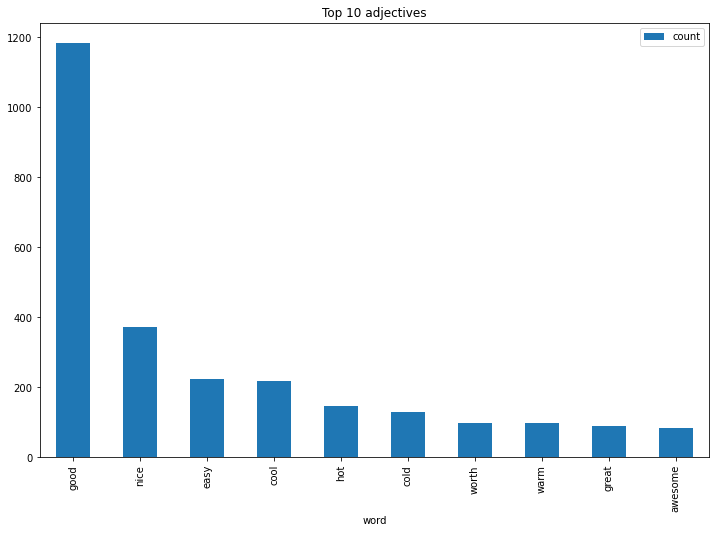

In [69]:
wd_dfb[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 adjectives');

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df1b=pd.DataFrame(words_freq)
wd_df1b.columns=['word','count']
wd_df1b[0:10]

word  count
0  product    788
1  quality    123
2    money    122
3      buy    106
4    dryer     94
5  working     88
6     hair     70
7  havells     54
8    price     49
9      air     47

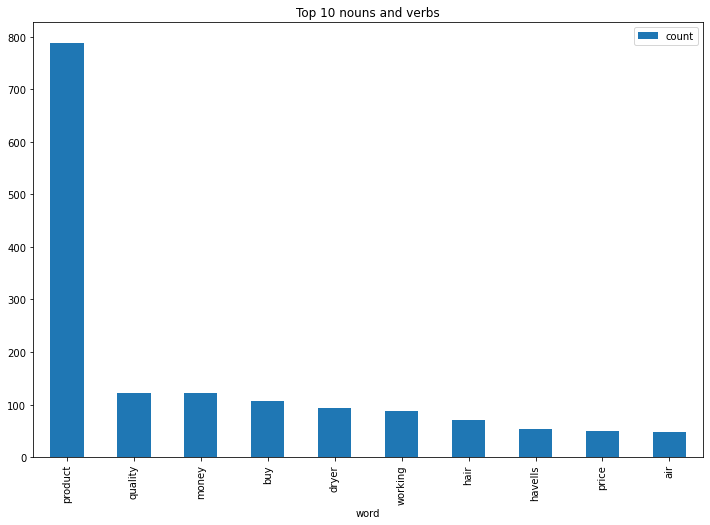

In [70]:
wd_df1b[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');